In [26]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display,Markdown

In [27]:
baseline_path = Path(
    r"D:\Projects\Waveform\Code\AlternativeRubenCode\waveform_feature_estimation\BaselineAnalysis"
    )

data = pd.concat([pd.read_csv(csv_path) for csv_path in baseline_path.glob("*.csv")])

data.head()

,ID,Target,value,Type,Model,InptRep,Dataset,GT,Fold
0,16_01_0,AUP,9.760329,target,peakdetection1d,traces,vicar,0,0
1,16_01_1,AUP,9.800429,target,peakdetection1d,traces,vicar,0,0
2,16_01_2,AUP,9.769843,target,peakdetection1d,traces,vicar,0,0
3,16_01_3,AUP,9.812561,target,peakdetection1d,traces,vicar,0,0
4,16_01_4,AUP,9.678199,target,peakdetection1d,traces,vicar,0,0


In [28]:
data_pvt = data.pivot(index=["ID","Target","Model","InptRep","Dataset","GT","Fold"],columns='Type',values='value').reset_index()
data_pvt.head()


Type,ID,Target,Model,InptRep,Dataset,GT,Fold,pred,target
0,01_01_0,AUP,peakdetection1d,traces,vicar,1,0,982.56976,9.802522
1,01_01_0,HR,peakdetection1d,traces,vicar,1,0,68.48200,71.107700
2,01_01_0,PWA,peakdetection1d,traces,vicar,1,0,4214.64940,0.076763
3,01_01_0,RT,peakdetection1d,traces,vicar,1,0,162.96298,157.400000
4,01_01_1,AUP,peakdetection1d,traces,vicar,1,0,980.17380,9.779054


## Using GT:1 vicar

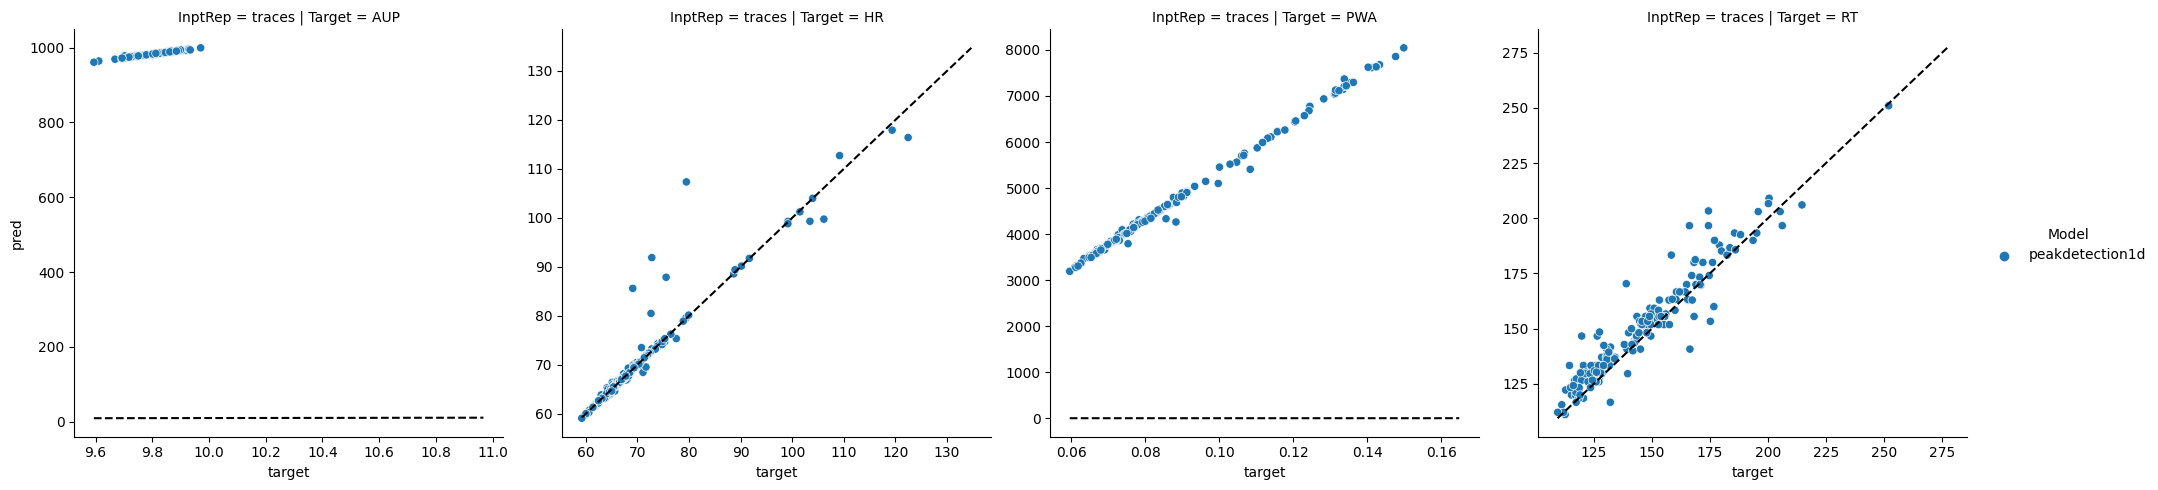

## Using GT:1 vipl

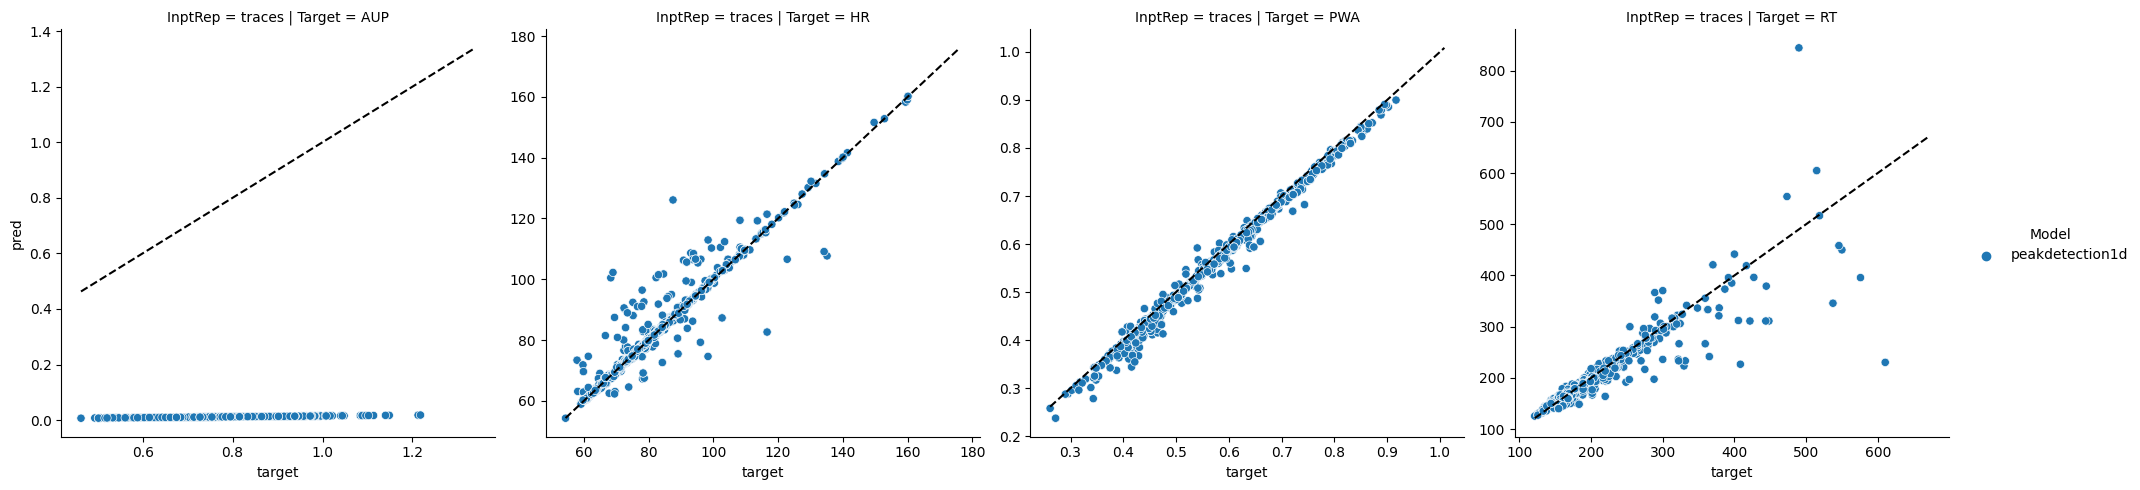

## Using GT:0 vicar

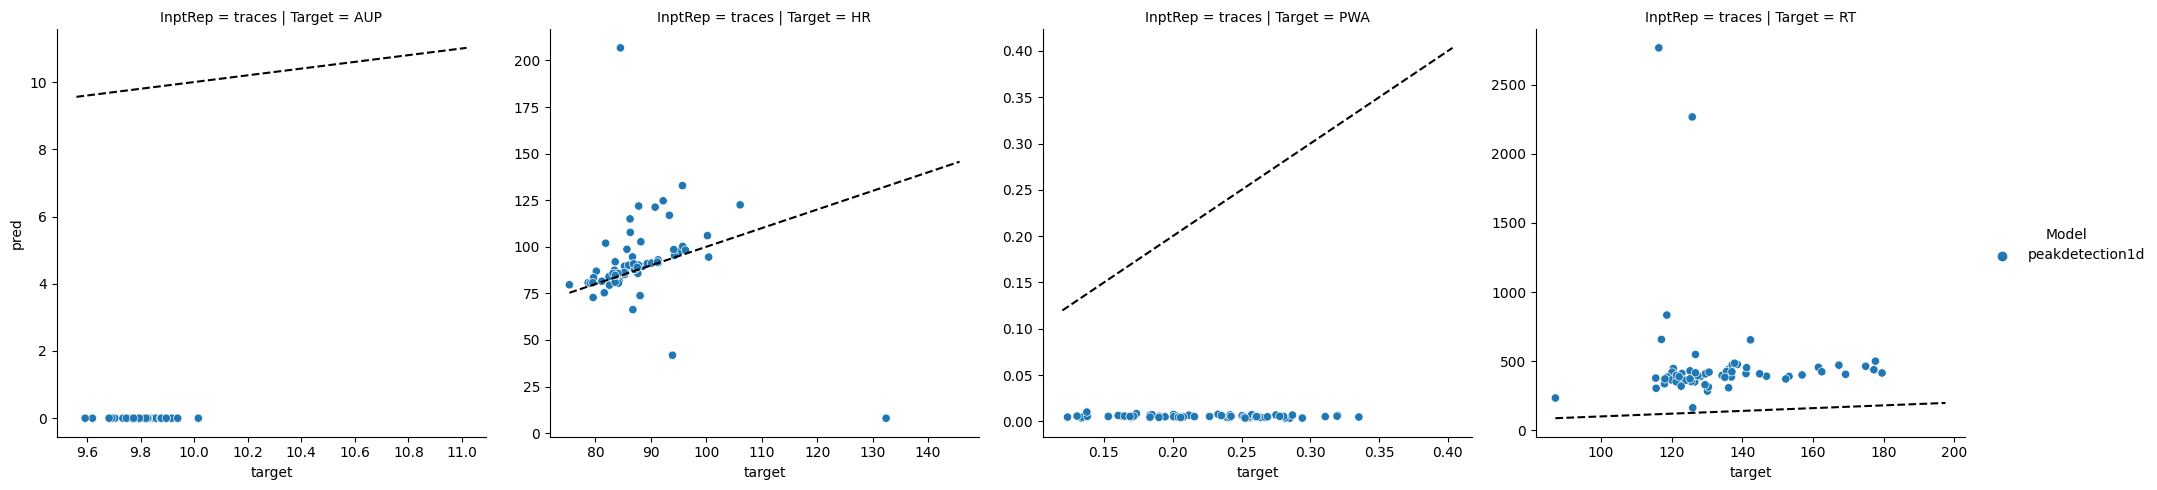

## Using GT:0 vipl

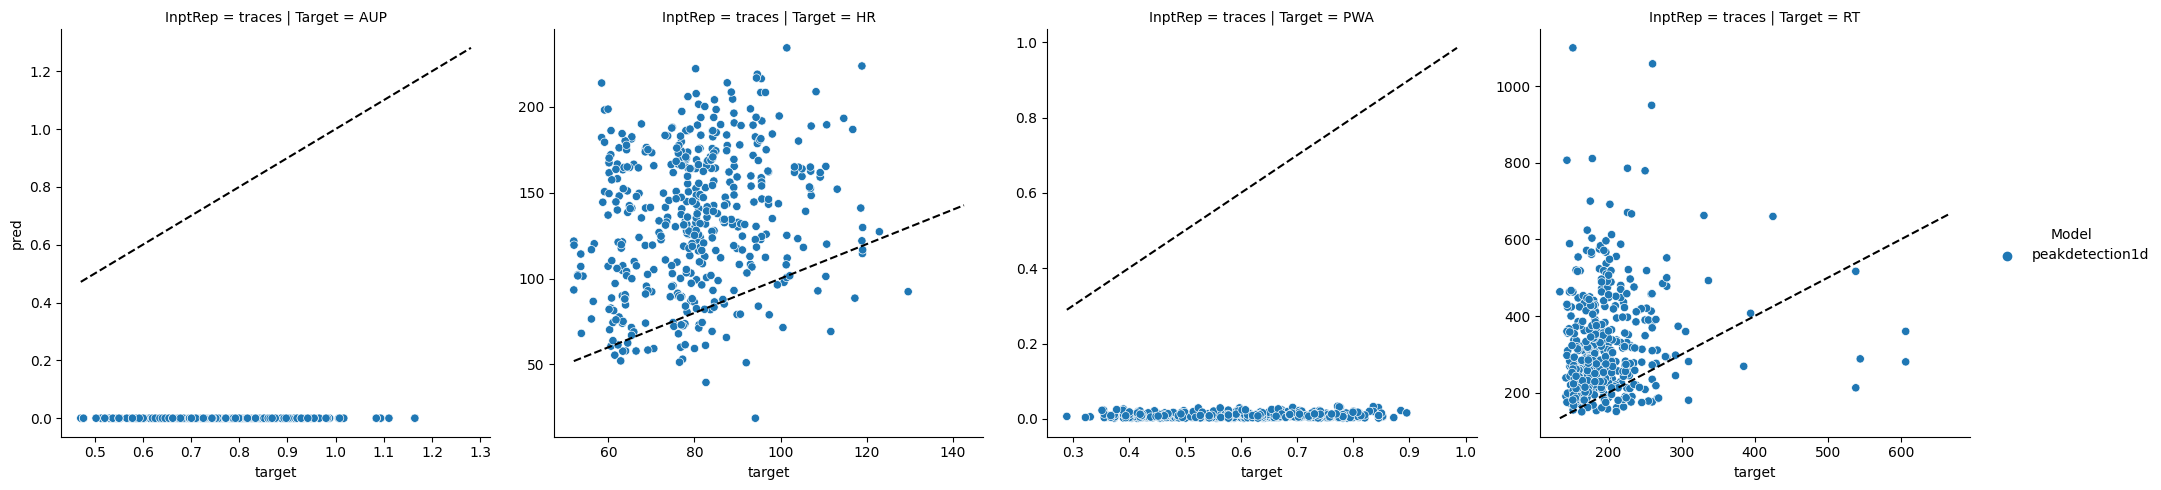

In [29]:
data_pvt_mean = data_pvt.groupby(["ID","Target","Model","InptRep","Dataset","GT"]).mean().reset_index()
for gt in data_pvt_mean.GT.unique():
    for dataset in data_pvt_mean.Dataset.unique():
        display(Markdown(f"## Using GT:{gt} {dataset}"))
        plt_df = data_pvt_mean.query(f"GT == {gt} and Dataset == '{dataset}'")
        g = sns.relplot(data=plt_df, y='pred', x='target',hue='Model',col='Target',row='InptRep',kind='scatter',facet_kws={'sharex':False,'sharey':False})
        
        for ax,(ax_idx,sub_plt_df) in zip(g.axes.flat,g.facet_data()):            
            x = (sub_plt_df.target.min(),sub_plt_df.target.max()*1.1)
            y = (sub_plt_df.target.min(),sub_plt_df.target.max()*1.1)
            # ax.set_aspect('equal')            
            ax.plot(y, x,'--k')

        plt.show()

In [30]:
acc = lambda x: np.mean(np.abs(x['target'] - x['pred']))
corr = lambda x: np.mean(x['target'].corr(x['pred']))

display(Markdown("# Accuracy as MAE"))

a = data_pvt.groupby(["Target","Model","InptRep","Dataset","GT"]).apply(acc)
a = a.to_frame().reset_index()
b = a.pivot(columns=["Target"],index=['Dataset',"GT"],values=0)
display(b.style.background_gradient(axis=0, cmap="RdYlGn_r"))

display(Markdown("# Correlation"))

a = data_pvt.groupby(["Target","Model","InptRep","Dataset","GT"]).apply(corr)
a = a.to_frame().reset_index()
b = a.pivot(columns=["Target"],index=['Dataset',"GT"],values=0)
display(b.style.background_gradient(axis=None, vmin=-1,vmax=1,cmap="RdYlGn"))

# Accuracy as MAE

# Correlation